In [1]:
import iris
import datetime
from iris.time import PartialDateTime

import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt

import matplotlib.cm as mpl_cm

import cartopy
import cartopy.crs as ccrs

import numpy

In [2]:
%matplotlib inline

In [3]:
print iris.__version__
print cartopy.__version__

1.7.2-DEV
0.11.x


In [6]:
ufile = '/home/dbirving/Downloads/Data/ua_ERAInterim_500hPa_090day-runmean-1989_native.nc'
vfile = '/home/dbirving/Downloads/Data/va_ERAInterim_500hPa_090day-runmean-1989_native.nc'
#/users/damienirving/

In [7]:
# Pick April data
time_constraint = iris.Constraint(time=lambda t: PartialDateTime(month=3) <= t <= PartialDateTime(month=5))
lat_constraint = iris.Constraint(latitude=lambda y: y <= 0.0)

with iris.FUTURE.context(cell_datetime_objects=True):
    u_cube = iris.load_cube(ufile, 'eastward_wind' & time_constraint & lat_constraint)
    v_cube = iris.load_cube(vfile, 'northward_wind' & time_constraint & lat_constraint)

In [8]:
print u_cube

eastward_wind / (m s**-1)           (time: 92; latitude: 121; longitude: 480)
     Dimension coordinates:
          time                           x             -               -
          latitude                       -             x               -
          longitude                      -             -               x
     Attributes:
          CDI: Climate Data Interface version 1.5.3 (http://code.zmaw.de/projects/cdi...
          CDO: Climate Data Operators version 1.5.3 (http://code.zmaw.de/projects/cdo...
          Conventions: CF-1.0
          history: Wed Sep 10 07:43:38 2014: cdo seldate,1989-01-01,1989-12-31 ua_ERAInterim_500hPa_090day-runmean_native.nc...
          nco_openmp_thread_number: 1


In [9]:
print u_cube.standard_name
print u_cube.long_name
print u_cube.units
print u_cube.name()
print ''
print type(u_cube.data)
print u_cube.data.shape

eastward_wind
U component of wind
m s**-1
eastward_wind

<type 'numpy.ndarray'>
(92, 121, 480)


In [10]:
print 'All times :\n', u_cube.coord('time')

All times :
DimCoord([1989-03-01 06:00:00, 1989-03-02 06:00:00, 1989-03-03 06:00:00,
       1989-03-04 06:00:00, 1989-03-05 06:00:00, 1989-03-06 06:00:00,
       1989-03-07 06:00:00, 1989-03-08 06:00:00, 1989-03-09 06:00:00,
       1989-03-10 06:00:00, 1989-03-11 06:00:00, 1989-03-12 06:00:00,
       1989-03-13 06:00:00, 1989-03-14 06:00:00, 1989-03-15 06:00:00,
       1989-03-16 06:00:00, 1989-03-17 06:00:00, 1989-03-18 06:00:00,
       1989-03-19 06:00:00, 1989-03-20 06:00:00, 1989-03-21 06:00:00,
       1989-03-22 06:00:00, 1989-03-23 06:00:00, 1989-03-24 06:00:00,
       1989-03-25 06:00:00, 1989-03-26 06:00:00, 1989-03-27 06:00:00,
       1989-03-28 06:00:00, 1989-03-29 06:00:00, 1989-03-30 06:00:00,
       1989-03-31 06:00:00, 1989-04-01 06:00:00, 1989-04-02 06:00:00,
       1989-04-03 06:00:00, 1989-04-04 06:00:00, 1989-04-05 06:00:00,
       1989-04-06 06:00:00, 1989-04-07 06:00:00, 1989-04-08 06:00:00,
       1989-04-09 06:00:00, 1989-04-10 06:00:00, 1989-04-11 06:00:00,
     

In [11]:
u_temporal_mean = u_cube.collapsed('time', iris.analysis.MEAN)
v_temporal_mean = v_cube.collapsed('time', iris.analysis.MEAN)

/usr/local/anaconda/lib/python2.7/site-packages/iris/coords.py:959: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'time'.
  warnings.warn(msg.format(self.name()))


In [12]:
print u_temporal_mean

eastward_wind / (m s**-1)           (latitude: 121; longitude: 480)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:
          time: 1989-04-15 18:00:00, bound=(1989-03-01 06:00:00, 1989-05-31 06:00:00)
     Attributes:
          CDI: Climate Data Interface version 1.5.3 (http://code.zmaw.de/projects/cdi...
          CDO: Climate Data Operators version 1.5.3 (http://code.zmaw.de/projects/cdo...
          Conventions: CF-1.0
          history: Wed Sep 10 07:43:38 2014: cdo seldate,1989-01-01,1989-12-31 ua_ERAInterim_500hPa_090day-runmean_native.nc...
          nco_openmp_thread_number: 1
     Cell methods:
          mean: time


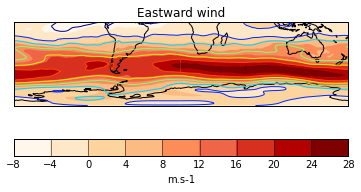

In [13]:
# Load a Cynthia Brewer palette.
brewer_cmap = mpl_cm.get_cmap('brewer_OrRd_09')

# Draw the contours, with n-levels set for the map colours (9).
# NOTE: needed as the map is non-interpolated, but matplotlib does not provide
# any special behaviour for these.
qplt.contourf(u_temporal_mean, brewer_cmap.N, cmap=brewer_cmap)
#qplt.contourf(temporal_mean, 25)
qplt.contour(u_temporal_mean)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()

plt.show()

In [14]:
for coord in u_temporal_mean.coords():
    print coord.name()

latitude
longitude
time


In [15]:
test = u_temporal_mean.data
print test.shape

(121, 480)


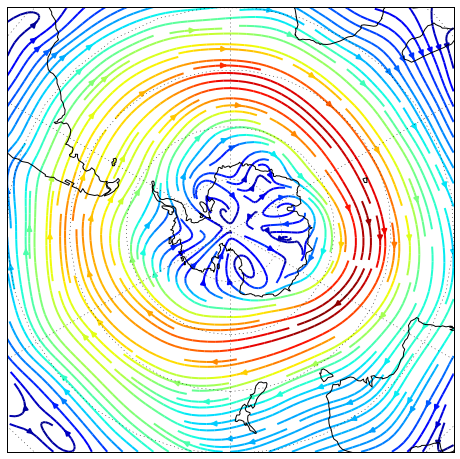

In [18]:
## Define the data
x = u_temporal_mean.coords('longitude')[0].points
y = u_temporal_mean.coords('latitude')[0].points
u = u_temporal_mean.data
v = v_temporal_mean.data

plt.figure(figsize=(8, 10))

## Select the map projection
ax = plt.axes(projection=ccrs.SouthPolarStereo())
#ax = plt.axes(projection=ccrs.Stereographic(central_latitude=0.0, 
#                                            central_longitude=0.0, 
#                                            false_easting=0.0, 
#                                            false_northing=0.0, 
#                                            true_scale_latitude=None, 
#                                            globe=None))
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((x.min(), x.max(), y.min(), -30.0), crs=ccrs.PlateCarree())
## Plot coast and gridlines (currently an error with coastline plotting)
ax.coastlines()
ax.gridlines()
#ax.set_global()

## Plot the data
# Streamplot
magnitude = (u ** 2 + v ** 2) ** 0.5
ax.streamplot(x, y, u, v, transform=ccrs.PlateCarree(), linewidth=2, density=2, color=magnitude)

# Wind vectors
#ax.quiver(x, y, u, v, transform=ccrs.PlateCarree(), regrid_shape=40) 

# Contour
#qplt.contourf(u_temporal_mean)

plt.show()

Problems:

  1. I need to load in the correct v-wind data
  2. The quiver plot gives weird results if I don't restrict the latitude dimension of the cube...
  3. I probably need to double check that `ccrs.PlateCarree()` is the correct default projection for my data